In [1]:
# Standard lib
import sys
import glob
                
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
import xarray as xr

from matplotlib.ticker import ScalarFormatter
from shapely.geometry import Point
import seaborn as sns
# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

import cartopy.crs as ccrs
import cartopy.feature
import pandas as pd

from sklearn import preprocessing

from scipy.interpolate import interp2d

from sklearn.decomposition import pca

import netCDF4 as nc

from MapXtremePCIC import MapXtremePCIC

In [6]:
# Set path to RCM data
PATH = './data/pr_24hr_50yrs/'

In [5]:
obj = MapXtremePCIC(50, 'eof', PATH)
data_cube = obj.load_data
print(data_cube)

<xarray.Dataset>
Dimensions:  (rlat: 124, rlon: 149, run: 35, x: 124, y: 149)
Coordinates:
    lon      (x, y) float64 233.5 233.8 234.2 234.6 ... 331.5 332.0 332.5 333.0
    lat      (x, y) float64 14.04 14.2 14.36 14.51 ... 60.17 59.87 59.56 59.26
  * rlon     (rlon) float64 -32.56 -32.12 -31.68 -31.24 ... 31.68 32.12 32.56
  * rlat     (rlat) float64 -27.28 -26.84 -26.4 -25.96 ... 25.96 26.4 26.84
Dimensions without coordinates: run, x, y
Data variables:
    pr       (x, y, run) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    pr:       mm h-1
    lon:      degrees
    lat:      degrees
    rlon:     degrees
    rlat:     degrees


In [19]:
linear = data_cube['lat'].shape[0]*data_cube['lat'].shape[1]

data_cube['run'].values

X = np.reshape(data_cube['pr'].values, (data_cube['run'].values.shape[0], linear))

In [56]:
x_bar = np.nanmean(X, axis=1)

In [60]:
X_prime = np.multiply(np.ones(data_cube['run'].shape), x_bar)

In [62]:
X_prime.shape

(35,)

In [37]:
help(np.ones)

Help on function ones in module numpy.core.numeric:

ones(shape, dtype=None, order='C')
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of ones with the given shape, dtype, and order.
    
    See Also
    --------
    ones_like : Return an array of ones with shape and type of input.
    empty : Return a new uninitialized array.
    zeros : Return a new array setting values to zero.
    full : Return a new array of given shape filled with value.
    
    
    Examples
   

In [18]:
dfx = CanRCM4['df_pr'][dataset_list[1]].T

prx = {'pr': dfx.values.flatten(),
       'rlon': np.tile(CanRCM4['rlon'], len(rlat)),
       'rlat': np.tile(CanRCM4['rlat'], len(rlon))
      }

idx = np.argwhere(~np.isnan(prx['pr']))[:,0]

print(prx['pr'][idx])

prx_maskd = {'pr': prx['pr'][idx],
            'rlon': prx['rlon'][idx],
            'rlat': prx['rlat'][idx]
            }

[2.55115519 2.35310904 2.58929278 ... 1.38659786 1.60045043 1.37218932]


In [19]:
df_prx = pd.DataFrame.from_dict(prx_maskd).sample(frac=0.02)

In [21]:
### START OF CLASS
res = 50
# Finds closest value to res in array
resLibrary = [50, 25, 10, 5, 1]
resLib = resLibrary[np.argmin(np.abs(np.subtract(res, res_library)))]
resFactor = resLib/res

#method <- match.arg(method)

# organize (35) maps to (35) vectors
xtreme = np.asarray(CanRCM4['df_pr'])
rlon = CanRCM4['rlon']
rlat = CanRCM4['rlat']

NameError: name 'res_library' is not defined

In [15]:
# Get dimensions of input
xtreme_dim = xtreme.shape
nrlon = rlon.shape[0]
nrlat = rlat.shape[0]
nrun = xtreme.shape[0] # Number of files

# initialize empty array
xtremeMatrix = np.zeros((nrun, nrlon*nrlat))

# Sklearn prep
lons, lats = np.meshgrid(rlon, rlat)

NameError: name 'xtreme' is not defined

In [16]:
# Reshape 3D array into 2D combined array, i.e. 35 x 18476.
# Each value in array is pr
X = np.reshape(xtreme, (xtreme.shape[0], nrlat * nrlon), order='F')

# Wherever there is NaN in array, that is a non-land value. 
# Create masked array
X = ma.masked_array(X, np.isnan(X))

# Mask the ocean points
ocean = X.sum(0).mask

# Declare anything not masked as land
# i.e. Compliment of ocean is land values in
# boolean masked array
land = ~ocean

# Get land values only from array
X = X[:, land]

NameError: name 'xtreme' is not defined

In [ ]:
# Standardize data
scaler  = preprocessing.StandardScaler()
scaler_sst = scaler.fit(X)

# Apply standardization
X = scaler_sst.transform(X)

# Should be gaussian centered on zero
self.mean = X.mean()
self.std = X.std()

# Find principal components of our array
skpca = pca.PCA()
skpca.fit(X)

# Number of PC to explain 70% of variance
ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.70)[0][0]

PCs = skpca.transform(X)

# Get Empirical Orthogonal Functions components
EOFs = skpca.components_

# Select EOFs up to 70% of explained variance
EOFs = EOFs[:ipc, :] 
self.eof_shape = EOFs.shape

# Create a new "dimension-reduced" PCA'd array
EOF_recons = np.ones((ipc, len(rlat) * len(rlon))) * -999.
for i in range(ipc): 
    # Fill each land portion of grid with
    # transformed principal components up to ipc
    EOF_recons[i,land] = EOFs[i,:] 

EOF_recons = ma.masked_values(np.reshape(EOF_recons, (ipc, len(rlat), len(rlon)), order='F'), -999.)

EOF_recons *= 100

self.EOF_recons = EOF_recons

proj = "+proj=ob_tran +o_proj=longlat +lon_0=-97 +o_lat_p=42.5 +a=1 +to_meter=0.0174532925199 +no_defs"

rp = ccrs.RotatedPole(pole_longitude=-97 - 180,
                      pole_latitude=42.5,
                      globe=ccrs.Globe(semimajor_axis=6370000,
                                       semiminor_axis=6370000))
proj = {'proj':'ob_tran', 'o_proj':'longlat', 'lon_0':-97, 'o_lat_p':42.5,
        'a':1, 'to_meter':0.0174532925199}

rlon_itrp = np.linspace(np.min(rlon), np.min(rlon), len(rlon)*10)
rlat_itrp = np.linspace(np.min(rlat), np.min(rlat), len(rlat)*10)

Rlon, Rlat = np.meshgrid(rlon, rlat)

f = interp2d(Rlon, Rlat, EOF_recons[0, :, :])
EOF_new = f(rlon_itrp, rlat_itrp)
self.EOF_new = EOF_new

plt.figure(figsize=(15, 15))

ax = plt.axes(projection=rp)
#ax.coastlines('110m', linewidth=0.8)
ax.pcolormesh(rlon_itrp, rlat_itrp, EOF_new[:,:], transform=rp, cmap=plt.cm.rainbow)

In [17]:
'''
class MapXtremePCIC:
    """ 
    MapXtremePCIC maps design values over North America
    ====================================================
    Arguments
     CanRCM4.lens : information data list for CanRCM4 modelled design values over North America
     obs : data array of observed design values over North America, [lon, lat, data] three columns 
     res : resolution (in km) of the map
     method : whether EOF or SOM-based method is employed for mapping
     
    Value
     rlon : vector of longitude coordinates of the map
     rlat : vector of latitude coordinates of the map
     xtreme : data array of the mapped design values
     sp.basis : data array of the spatial basis functions estimated from CanRCM4 modelled data
     obs.grid : data array of the gridded observations 
    
    Note: the coordinate system is in polar rotated projection for all involved arrays. The projection
     is "+proj=ob_tran +o_proj=longlat +lon_0=-97 +o_lat_p=42.5 +a=1 +to_meter=0.0174532925199 +no_defs"
     
    Author : Nic Annau at PCIC, University of Victoria, nannau@uvic.ca
    """

    def __init__(self, CanRCM4, obs, res, method):
        
        self.CanRCM4 = CanRCM4
        self.obs = obs
        self.res = res
        self.method = method
        
        if (type(method) != type('string')):
            raise ValueError('Method argument requires {} got {}'.format(type('string'), type(method)))
        if (method != 'eof' and method != 'som'):
            raise Exception('MapXtremePCIC requires specified \'som\' or \'eof\'. Got {}'.format(method))
        
        if (obs.shape[0] < 100):
            raise Exception('Observed design values sample size of {} is too small (<100).'.format(obs.shape[0]))

        
        # Set default res if not specified
        if (res == None):
            print("Res not specified. Setting default res = 50.")
            self.res = 50
        
        # Check map resolution    
        if (type(res) != type(1)):
            raise ValueError('Mapping resolution requires {}, got {}'.format(type(1), type(res)))
        
        # Finds closest value to res in array
        resLibrary = [50, 25, 10, 5, 1]
        resLib = resLibrary[np.argmin(np.abs(np.subtract(res, res_library)))]
        resFactor = resLib/res

        #method <- match.arg(method)

        # organize (35) maps to (35) vectors
        xtreme = np.asarray(CanRCM4['df_pr'])
        rlon = CanRCM4['rlon']
        rlat = CanRCM4['rlat']

        # Get dimensions of input
        xtreme_dim = xtreme.shape
        nrlon = rlon.shape[0]
        nrlat = rlat.shape[0]
        nrun = xtreme.shape[0] # Number of files
                
        # initialize empty array
        xtremeMatrix = np.zeros((nrun, nrlon*nrlat))
        
        # Sklearn prep
        lons, lats = np.meshgrid(rlon, rlat)
        
        # Reshape 3D array into 2D combined array, i.e. 35 x 18476.
        # Each value in array is pr
        X = np.reshape(xtreme, (xtreme.shape[0], nrlat * nrlon), order='F')

        # Wherever there is NaN in array, that is a non-land value. 
        # Create masked array
        X = ma.masked_array(X, np.isnan(X))

        # Mask the ocean points
        ocean = X.sum(0).mask
        
        # Declare anything not masked as land
        # i.e. Compliment of ocean is land values in
        # boolean masked array
        land = ~ocean
        
        # Get land values only from array
        X = X[:, land]
        
        # Standardize data
        scaler  = preprocessing.StandardScaler()
        scaler_sst = scaler.fit(X)
        
        # Apply standardization
        X = scaler_sst.transform(X)
        
        # Should be gaussian centered on zero
        self.mean = X.mean()
        self.std = X.std()

        # Find principal components of our array
        skpca = pca.PCA()
        skpca.fit(X)
        
        # Number of PC to explain 70% of variance
        ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.70)[0][0]
        
        PCs = skpca.transform(X)
        
        # Get Empirical Orthogonal Functions components
        EOFs = skpca.components_
        
        # Select EOFs up to 70% of explained variance
        EOFs = EOFs[:ipc, :] 
        self.eof_shape = EOFs.shape

        # Create a new "dimension-reduced" PCA'd array
        EOF_recons = np.ones((ipc, len(rlat) * len(rlon))) * -999.
        for i in range(ipc): 
            # Fill each land portion of grid with
            # transformed principal components up to ipc
            EOF_recons[i,land] = EOFs[i,:] 
        
        EOF_recons = ma.masked_values(np.reshape(EOF_recons, (ipc, len(rlat), len(rlon)), order='F'), -999.)

        EOF_recons *= 100
        
        self.EOF_recons = EOF_recons
        
        proj = "+proj=ob_tran +o_proj=longlat +lon_0=-97 +o_lat_p=42.5 +a=1 +to_meter=0.0174532925199 +no_defs"
        
        rp = ccrs.RotatedPole(pole_longitude=-97 - 180,
                              pole_latitude=42.5,
                              globe=ccrs.Globe(semimajor_axis=6370000,
                                               semiminor_axis=6370000))
        proj = {'proj':'ob_tran', 'o_proj':'longlat', 'lon_0':-97, 'o_lat_p':42.5,
                'a':1, 'to_meter':0.0174532925199}
        
        rlon_itrp = np.linspace(np.min(rlon), np.min(rlon), len(rlon)*10)
        rlat_itrp = np.linspace(np.min(rlat), np.min(rlat), len(rlat)*10)
        
        Rlon, Rlat = np.meshgrid(rlon, rlat)
                
        f = interp2d(Rlon, Rlat, EOF_recons[0, :, :])
        EOF_new = f(rlon_itrp, rlat_itrp)
        self.EOF_new = EOF_new
        
        plt.figure(figsize=(15, 15))
        
        ax = plt.axes(projection=rp)
        #ax.coastlines('110m', linewidth=0.8)
        ax.pcolormesh(rlon_itrp, rlat_itrp, EOF_new[:,:], transform=rp, cmap=plt.cm.rainbow)


        # In order to reproduce the extent, we can't use cartopy's smarter
        # "set_extent" method, as the bounding box is computed based on a transformed
        # rectangle of given size. Instead, we want to emulate the "lower left corner"
        # and "upper right corner" behaviour of basemap.
        #xs, ys, zs = rp.transform_points(pc,
        #                                 np.array([-129.08, 22.66]),
        #                                 np.array([-10.59, 46.59])).T
        #ax.set_xlim(xs)
        #ax.set_ylim(ys)

        plt.show()
        # mapping
        #map.xtreme <- map.tp.basis[1]
        #for (i in 1:4) {
        #map.xtreme <- map.xtreme+map.sp.basis[, , i]*map.tp.basis[i+1]
        #}

        # output
        #return(list(rlon=map.rlon,
        #          rlat=map.rlat,
        #          xtreme=map.xtreme,
        #          sp.basis=map.sp.basis,
        #          obs.grid=obs.grid))
        

'''

/home/nannau/Desktop/map-xtreme/venv/lib/python3.6/site-packages/scipy/interpolate/_fitpack_impl.py:976: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=149,128 m=18476 fp=2634702.107443 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


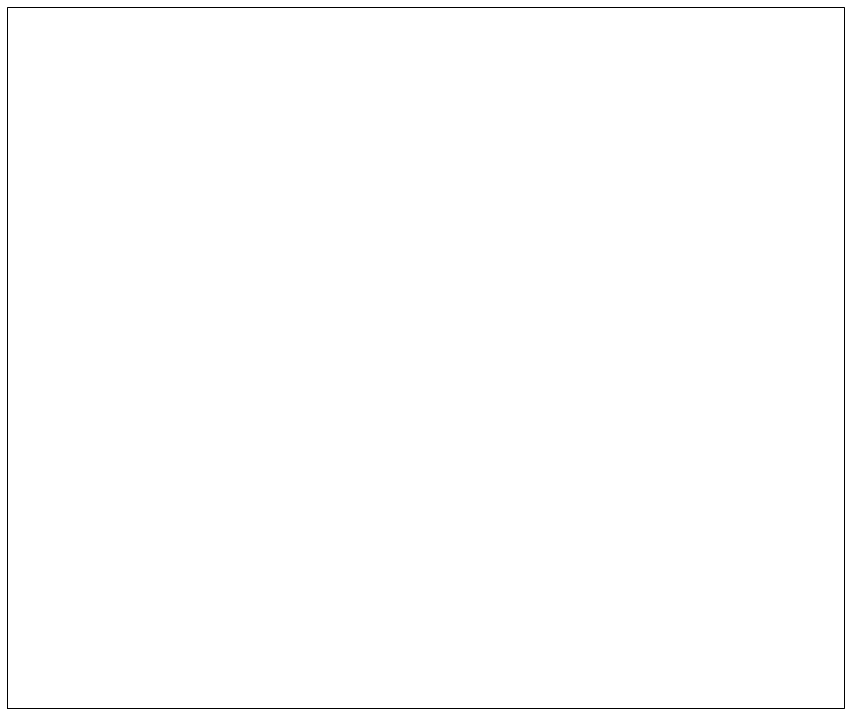

array([[-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       ...,
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.],
       [-999., -999., -999., ..., -999., -999., -999.]])

In [18]:
res = 50
method = 'som'
res_library = [50, 25, 10, 5, 1]

xtreme = CanRCM4['df_pr']

rlon = CanRCM4['rlon']

mappy = MapXtremePCIC(CanRCM4, df_prx, res, method)
mappy.EOF_new

In [ ]:
def landMask(lon, lat):
    """
    Creates land mask for North America
    Arguments
     lon : vector of longitude coordinates for making the land mask
     lat : vector of latitude coordinates for making the land mask
    Returns
     Value: a matrix with TRUE for land grid cells
    """
    nlon = len(lon)

    # all grid cells
    lon = np.tile(lon, len(lat))
    lat = np.tile(lat, len(lon))

    d = {'lon': lon,
         'lat': lat
        }

    pts = pd.DataFrame.from_dict(d)

    # pts.idx <- rownames(pts)

    # grid cells over land

    namCoastShp = coastlineCanRCM4() # Need to write this function

    worldBound = gpd.read_file(landPath)

    #pointList = [Point()]
    """
    coordinates(pts) <- ~lon+lat
    projection(pts) <- proj4string(nam.coast.shp)
    pts.land <- pts[!is.na(over(pts, as(nam.coast.shp, "SpatialPolygons"))),]
    pts.land <- data.frame(pts.land@coords)

    # where are the land grid cells 
    mask <- pts.idx %in% rownames(pts.land)

    # format as a matrix
    mask <- matrix(mask, nrow=num.lon, byrow=TRUE)
    """
    return()

In [ ]:
def plot_field(m, X, lats, lons, vmin, vmax, step, cmap=plt.get_cmap('jet'), \
               ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(8, (X.shape[0] / float(X.shape[1])) * 8))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), \
                    latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 30), labels=[0,0,0,1])
        m.drawparallels(np.arange(-80, 80, 20), labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

In [ ]:
################

# Snippet from earlier...

################
# flatten the rlon and rlat into one column for each file
""" 
xtremeMatrix = np.asarray([xtreme[i, :, :].T.flatten() for i in range(nrun)])

# Copies of array with replicates of _m
rlonMatrix = np.tile(rlon, nrlat)
rlatMatrix = np.tile(rlat, nrlon)

# Indexes of NaN
idx = np.argwhere(~np.isnan(xtremeMatrix))
idxx = idx[:, 0]
idxy = idx[:, 1]

# Mask grid cells with missing values, e.g., oceans
self.xtremeMatrix = xtremeMatrix[:, ~np.isnan(xtremeMatrix).any(axis=0)]
self.rlonMatrix = rlonMatrix[~np.isnan(xtremeMatrix).any(axis=0)]
self.rlatMatrix = rlatMatrix[~np.isnan(xtremeMatrix).any(axis=0)]

# Spatial basis function
if (method == 'eof'):
# create a solver class, taking advantage of built-in weighting
solver = Eof(xtremeMatrix, weights='coslat')

# retrieve the first two EOFs from the solver class
eofs = solver.eofs(neofs=2)

"""